In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv('Stroke.csv')

In [3]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [4]:
dataset.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [5]:
dataset.shape

(43400, 12)

In [6]:
train=pd.read_csv('train_2v.csv')

In [7]:
train.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

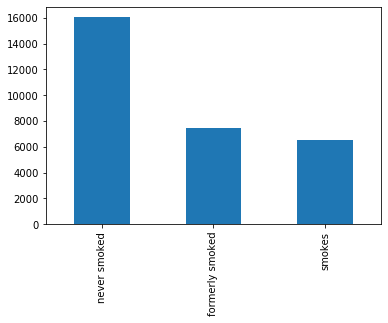

In [8]:
dataset.smoking_status.value_counts().plot(kind='bar')

In [9]:
n=dataset[dataset.smoking_status.isna()].index

In [10]:
dataset.iloc[n]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
10,10460,Female,79.0,0,0,Yes,Govt_job,Urban,77.08,35.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43382,35179,Female,9.0,0,0,No,children,Urban,68.49,16.8,NaN,0
43385,5366,Female,66.0,0,0,Yes,Self-employed,Urban,92.10,24.8,NaN,0
43389,30759,Male,14.0,0,0,No,children,Urban,82.48,24.8,NaN,0
43391,30077,Male,6.0,0,0,No,children,Urban,77.48,19.1,NaN,0


In [11]:
#lacking both bmi and smoking status
c=dataset[dataset.bmi.isna() & dataset.smoking_status.isna()].index

In [12]:
#lacking only bmi 
b=dataset[dataset.bmi.isna()].index

In [13]:
#droping the values where both were not present 
dataset=dataset.drop(dataset.index[c])

In [14]:
b=dataset[dataset.bmi.isna()].index

In [15]:
#droppping all na values 
dataset=dataset.dropna()

In [16]:
dataset=dataset.drop(columns=['id'])

In [17]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [18]:
#dataset=dataset.drop(columns=[dataset.id])
from sklearn.preprocessing import LabelEncoder

for i in range(len(dataset.columns)):
    typ=type(dataset.iloc[1,i])
    print(typ)
    if(typ==str):
        dataset.iloc[:,i]=LabelEncoder().fit_transform(dataset.iloc[:,i])
        
        

<class 'str'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.int64'>


In [19]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1,58.0,1,0,1,2,1,87.96,39.2,1,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0,0
6,0,52.0,0,0,1,2,1,77.59,17.7,0,0
7,0,75.0,0,1,1,3,0,243.53,27.0,1,0
8,0,32.0,0,0,1,2,0,77.67,32.3,2,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,0,10.0,0,0,0,4,1,58.64,20.4,1,0
43396,0,56.0,0,0,1,0,1,213.61,55.4,0,0
43397,0,82.0,1,0,1,2,1,91.94,28.9,0,0
43398,1,40.0,0,0,1,2,1,99.16,33.2,1,0


In [20]:
y=dataset.heart_disease
x=dataset.drop(columns=['heart_disease'])

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score

In [23]:
model_log=LogisticRegression().fit(x_train,y_train)
model_dtree=DecisionTreeClassifier().fit(x_train,y_train)
model_svc=SVC().fit(x_train,y_train)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
pred_log=model_log.predict(x_test)
pred_tree=model_svc.predict(x_test)
pred_svc=model_dtree.predict(x_test)

In [26]:
print(accuracy_score(y_test,pred_log))
print(accuracy_score(y_test,pred_svc))
print(accuracy_score(y_test,pred_tree))


0.9465176268271711
0.9092003439380911
0.9485812553740327
